# Probability distributions

## Interactive visualization of various distribution functions

### Different functions can be selected and set interactively.

**functions:**
- Poisson distribution
 - https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.poisson.html#scipy.stats.poisson
- Gamma - Poisson distribution
 - https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.nbinom.html#scipy.stats.nbinom
- Binomial distribution
 - https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.binom.html#scipy.stats.binom
- density function (Gauss function)
 - https://docs.scipy.org/doc/scipy-0.16.1/reference/generated/scipy.stats.norm.html
- Landau distribution
 - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.moyal.html
- Gamma distribution
 - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gamma.html#scipy.stats.gamma
- Weibull distribution
 - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.weibull_min.html#scipy.stats.weibull_min

In [8]:
# resources
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson, gamma, moyal, norm, binom, nbinom, weibull_min

#set backend for interactive toolbar
%matplotlib nbagg

In [9]:
# Warnings are issued during the calculation of the distributions.
# These are switched off here
import warnings
warnings.filterwarnings('ignore')

In [10]:
# interactive switches
#
# Signal selection
distribFuns = ['Poisson distribution', 'Gamma-Poisson distribution',
               'Binomial distribution', 'normal distribution', 'Landau distribution',
               'Gamma distribution', 'Weibull distribution']
distrib_select = widgets.Dropdown(description='', options=distribFuns,
                                  value='normal distribution',
                                  layout= widgets.Layout(width='55%',height='auto')
                                 )
#----------------------------------------------------------------------------------
layout= widgets.Layout(width='95%',height='auto')
style = {'description_width': 'initial'}
# Function parameters
# ------------------------------------------------------------------------------------------------------------------------------
#
# Gauss: µ: expected value, \ sigma: standard deviation
mu = widgets.FloatSlider(min=-150, max=150, value=0, continuous_update=False, layout= layout)
sigma = widgets.FloatSlider(min=0.1, max=15, value=1, layout= layout)
#
normLabel_1 = "µ: (expected value)"
normLabel_2 = "$\sigma$: (standard deviation)"

#------------------------------------------------------------------------------------------------------------------------------
#
# Poisson: expected value and variance µ (divided by Gauss expected value), µ> 0
poisLabel = "µ: (expected value and variance)"
#------------------------------------------------------------------------------------------------------------------------------
# Gamma-Poisson => negative binomial distribution:
# n: number of successes, alternatively adjustable via µ n = (µ² / {\ sigma} ² - µ)
# p: individual probability, alternatively adjustable via µ and sigma: p = (µ / {\ sigma} ²)
#
#         
gammaPoisLabel_1 = "n: (number of successes n. n > 0 (mean²/(var - mean))"
gammaPoisLabel_2 = "p: (probability of a single success. $0 \leq p \leq 1$ (mean/varianz)"

# ----------------------------------------------------------------------------------------------------------------------------
#
# Binomial distribution: n: number of successes, p: individual probability
# (Buttons divided by gamma-Poisson distribution)
#
binomLabel_1 = "n: (number of successes n. n > 0 (mean²/(var - mean))"
binomLabel_2 = "p: (probability of a single success. $0 \leq p \leq 1$ (mean/varianz)"

# ----------------------------------------------------------------------------------------------------------------------------
#
# Landau distribution: location parameter µ; Scale parameter c
# (Buttons divided by normal distribution and Poisson distribution)
landauLabel_1 = "µ: (expected value)"
landauLabel_2 = "$\sigma$: (standard deviation)"
# ----------------------------------------------------------------------------------------------------------------------------
#
# Gamma distribution: inverse scale parameter b; Shape parameters p
# ----------------------------------------------------------------------------------------------------------------------------
p_gamma = widgets.FloatSlider(min=0, max=150, value=1, step=0.01, continuous_update=False, layout= layout)
#
gammaLabel_1 = "p: form parameter (p>0)"
gammaLabel_2 = "b: (scaling factor)"
gammaLabel_3 = "µ: (average)"
#
# ----------------------------------------------------------------------------------------------------------------------------
#
# Weibull: - Scale and shape parameters:
#                      1 / lambda> 0
wblLabel_1 = "k: form parameter (k > 0)"
wblLabel_2 = "$\lambda$: (scaling parameter $\lambda$.$1 \over \lambda > 0$.)"
wblLabel_3 = "µ: (shift operator)"
#
# ---------------------------------------------------------------------------------------------------------------------------
# interactive buttons summarized in widget 'interact'
# - the buttons are adapted to each selected distribution function
#
label_1 = widgets.Label(vlaue="", tooltips="")
label_2 = widgets.Label(vlaue="", tooltips="")
label_3 = widgets.Label(vlaue="", tooltips="")

interakt = widgets.VBox([\
                         label_1,
                         widgets.FloatSlider(min=0.1, max=1.0,continuous_update=False),
                         label_2,
                         widgets.FloatSlider(min = 0.0, max=1.1, continuous_update=False),
                         label_3,
                         widgets.FloatSlider(min=0.1,max=1.1, continuous_update=False)
                        ]
                       )
# plot limits
x_range = widgets.IntRangeSlider(min= -200, max=200, value=[-5,5],description='$x_{range}$',\
                                 continuous_update=False, layout= layout)
#
BtnReset = widgets.Button(description="reset", button_style='warning')
# ---------------------------------------------------------------------------------------------------------------------------

In [11]:
def draw_ProbabilityDensity(x, f_distribution, ax):
    ax.clear()
    ax.set_title("density function for {}".format(distrib_select.value))
    # Draw the distribution again and then enter the relevant information
    if distrib_select.value in ['Poisson distribution', 'Gamma-Poisson distribution', 'Binomial distribution']:
        ax.bar(x, f_distribution, color='green', width=0.25)
    else:
        ax.plot(x, f_distribution, color='green', lw=2)
        ax.fill_between(x, 0, f_distribution, where =(f_distribution >= 0),\
                   facecolor='green', alpha=0.3)
    # Set the abscissa area according to the area selection
    ax.set_xlim(x_range.value[0], x_range.value[-1])
    ax.set_xlabel("x")
    ax.set_ylabel("probability")
    #
    # Indicate grid lines
    ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

In [12]:
def draw_cumulativeProbability(x, f_distribution, ax):
    ax.clear()
    ax.set_title("cumulative distribution for {}".format(distrib_select.value))
    ax.plot(x, f_distribution, color='C1', lw=2)
    ax.fill_between(x, 0, f_distribution, where =(f_distribution >= 0),\
                   facecolor='C1', alpha=0.3)
    # Set the abscissa area according to the area selection
    ax.set_xlim(x_range.value[0], x_range.value[-1])
    ax.set_xlabel("x")
    ax.set_ylabel("probability")
    # Indicate grid lines
    ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

In [13]:
def reset_controls(*btn):
    # Reset Button:
    global interakt
    distrib_select.value = 'normal distribution'
    interakt.children[0].value = normLabel_1
    interakt.children[2].value = normLabel_2
    interakt.children[1].disabled = False
    interakt.children[1].min = -150
    interakt.children[1].max = 150
    interakt.children[1].style.handle_color = "green"
    interakt.children[1].value = 0.0
    interakt.children[3].disabled = False
    interakt.children[3].min = 0.01
    interakt.children[3].max = 50
    interakt.children[3].value = 1
    interakt.children[3].step = 0.05
    interakt.children[3].style.handle_color = "green"
    interakt.children[4].disabled = True
    interakt.children[4].value = ""
    interakt.children[4].disabled = True
    interakt.children[4].value = ""
    x_range.value = [-5,5]
    update_view()

<IPython.core.display.Javascript object>


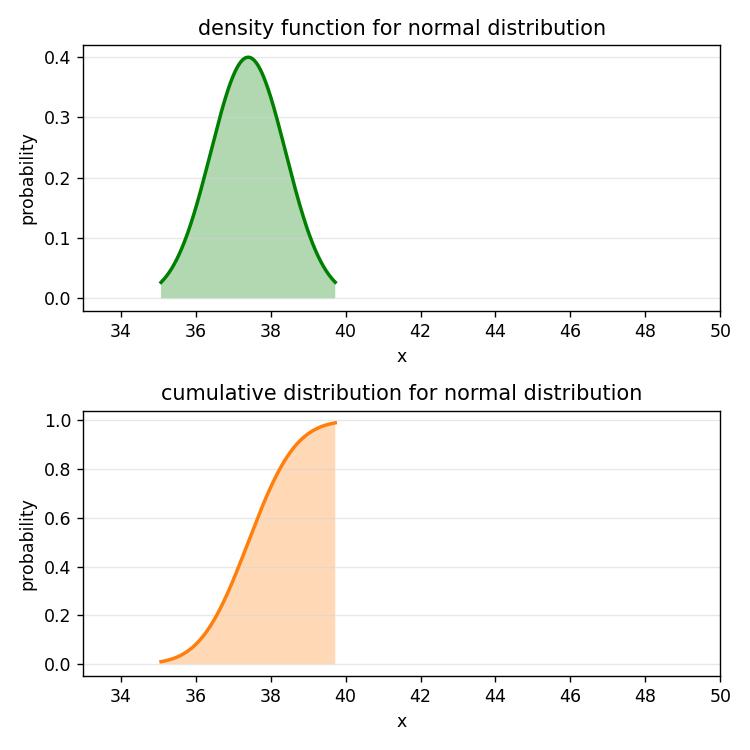

In [14]:
# interactive visualization
#
# draw figure:
#
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6,6))

distribType_old = ""
#
# 1. create a callback which updates the plot when a control-value has changed
def update_view(*args):
    global distribType_old
    global interakt
    
    # selections
    distribType = distrib_select.value
    
    initWidgets = True
    if distribType == distribType_old:
        initWidgets = False
    #-----------------------------------------------------------
    # Create data record according to the selected distribution function
    #
    # abscissa: ppf ({...}}) Percent point function (inverse of cdf - percentiles).
    # Density function / probability function: pdf ({...}}) / pmf ({...}})
    # cumulative density function: cdf ({...}}) Cumulative density function.
    #
    if (distribType == "normal distribution"):
        if initWidgets:
            # init intaeraktWidget
            interakt.children[0].value = normLabel_1
            interakt.children[2].value = normLabel_2
            interakt.children[1].disabled = False
            interakt.children[1].min = -150
            interakt.children[1].max = 150
            interakt.children[1].style.handle_color = "green"
            interakt.children[1].value = 0.0
            interakt.children[3].disabled = False
            interakt.children[3].min = 0.01
            interakt.children[3].max = 50
            interakt.children[3].value = 1
            interakt.children[3].step = 0.05
            interakt.children[3].style.handle_color = "green"
            interakt.children[4].disabled = True
            interakt.children[4].value = ""
            interakt.children[4].disabled = True
            interakt.children[4].value = ""
            #
        mu= interakt.children[1].value
        sigma = interakt.children[3].value
        #
        x_dist = np.arange(norm.ppf(0.01, mu, sigma), norm.ppf(0.99, mu, sigma), 1/100)
        distrib_f = norm(mu, sigma)
        #
        dist_prob = distrib_f.pdf(x_dist)
        dist_cdf = distrib_f.cdf(x_dist)
#------------------------------------------------ 
    if (distribType == "Poisson distribution"):
        if initWidgets:
            x_range.min = 0
            # init intaeraktWidget
            interakt.children[0].value = poisLabel
            interakt.children[1].disabled = False
            interakt.children[1].min = 0.1
            interakt.children[1].style.handle_color = "green"
            interakt.children[1].value = 3.76
            interakt.children[2].disabled = True
            interakt.children[2].value = ""
            interakt.children[3].style.handle_color = None
            interakt.children[3].disabled = True
            interakt.children[4].disabled = True
            interakt.children[4].value = ""
            interakt.children[4].disabled = True
            interakt.children[5].style.handle_color = None
            interakt.children[5].disabled = True
            #
        mu = interakt.children[1].value
        x_dist = np.arange(poisson.ppf(0.001, mu), poisson.ppf(0.999, mu))
        dist_prob = poisson.pmf(x_dist, mu)
        dist_cdf = poisson.cdf(x_dist, mu)
#--------------------------------------------------------       
    if (distribType == "Gamma-Poisson distribution"):
        if initWidgets:
            # Toggle diagram area so function is visible
            x_range.min = 0
            # init intaeraktWidget
            interakt.children[0].disabled = False
            interakt.children[0].value = gammaPoisLabel_1
            interakt.children[1].disabled = False
            interakt.children[1].style.handle_color = "green"
            interakt.children[1].min = 1
            interakt.children[1].max = 500
            interakt.children[1].value = 10
            interakt.children[1].step = 1.0
            interakt.children[2].disabled = False
            interakt.children[2].value = gammaPoisLabel_2
            interakt.children[3].disabled = False
            interakt.children[3].style.handle_color = "green"
            interakt.children[3].min = 0
            interakt.children[3].max = 1
            interakt.children[3].value = 0.5
            interakt.children[3].step = 0.05
            interakt.children[4].disabled = True
            interakt.children[4].value = ""
            interakt.children[5].disabled = True
            interakt.children[5].style.handle_color = None
        n= interakt.children[1].value
        p= interakt.children[3].value
        x_dist = np.arange(nbinom.ppf(0.001, n, p), nbinom.ppf(0.999, n, p))
        #
        distrib_f = nbinom(n, p)
        dist_prob = distrib_f.pmf(x_dist)
        dist_cdf = distrib_f.cdf(x_dist)
#------------------------------------------------------    
    if (distribType == "Binomial distribution"):
        if initWidgets:
            # Toggle diagram area so function is visible
            x_range.min = 0
            # init intaeraktWidget
            interakt.children[0].disabled = False
            interakt.children[0].value = binomLabel_1
            interakt.children[1].disabled = False
            interakt.children[1].style.handle_color = "green"
            interakt.children[1].min = 1
            interakt.children[1].max = 500
            interakt.children[1].value = 10
            interakt.children[1].step = 1.0
            interakt.children[2].disabled = False
            interakt.children[2].value = binomLabel_2
            interakt.children[3].disabled = False
            interakt.children[3].style.handle_color = "green"
            interakt.children[3].min = 0
            interakt.children[3].max = 1
            interakt.children[3].value = 0.5
            interakt.children[3].step = 0.05
            interakt.children[4].disabled = True
            interakt.children[4].value = ""
            interakt.children[5].disabled = True
            interakt.children[5].style.handle_color = None
        #
        n= interakt.children[1].value
        p= interakt.children[3].value
        #
        x_dist = np.arange(binom.ppf(0.01, n, p), binom.ppf(0.99, n, p))
        distrib_f = binom(n, p)
        dist_prob = distrib_f.pmf(x_dist)
        dist_cdf = distrib_f.cdf(x_dist)
#-----------------------------------------------------------       
    if (distribType == "Gamma distribution"):
        if initWidgets:
            # Toggle diagram area so function is visible
            x_range.min = 0
            # init intaeraktWidget
            interakt.children[0].disabled = False
            interakt.children[0].value = gammaLabel_1
            interakt.children[1].disabled = False
            interakt.children[1].style.handle_color = "green"
            interakt.children[1].min = 0
            interakt.children[1].max = 150
            interakt.children[1].value = 1
            interakt.children[1].step = 0.05
            interakt.children[2].disabled = False
            interakt.children[2].value = gammaLabel_2
            interakt.children[3].disabled = False
            interakt.children[3].style.handle_color = "green"
            interakt.children[3].min = 0
            interakt.children[3].max = 15
            interakt.children[3].value = 0.05
            interakt.children[3].step = 0.05
            interakt.children[4].disabled = False
            interakt.children[4].value = gammaLabel_3
            interakt.children[5].disabled = False
            interakt.children[5].style.handle_color = "green"
            interakt.children[5].min = 0
            interakt.children[5].value = 0
            interakt.children[5].step = 1.0
            interakt.children[5].max = 150
        #
        p = interakt.children[1].value
        sigma = interakt.children[3].value
        mu = interakt.children[5].value
        x_dist = np.arange(gamma.ppf(0.001, p, loc=mu), gamma.ppf(0.999, p, loc=mu), 1/100)
        #
        distrib_f = gamma(p, loc= mu, scale= sigma)
        dist_prob = distrib_f.pdf(x_dist)
        dist_cdf = distrib_f.cdf(x_dist)
#----------------------------------------------------------
    if (distribType == "Landau distribution"):
        if initWidgets:
            # Toggle diagram area so function is visible
            x_range.min = -10
            # init intaeraktWidget
            interakt.children[0].disabled = False
            interakt.children[0].value = landauLabel_1
            interakt.children[1].disabled = False
            interakt.children[1].style.handle_color = "green"
            interakt.children[1].min = -150
            interakt.children[1].max = 150
            interakt.children[1].value = 1
            interakt.children[1].step = 0.1
            interakt.children[2].disabled = False
            interakt.children[2].value = landauLabel_2
            interakt.children[3].disabled = False
            interakt.children[3].style.handle_color = "green"
            interakt.children[3].min = 0
            interakt.children[3].max = 15
            interakt.children[3].step = 0.05
            interakt.children[4].disabled = True
            interakt.children[4].value = ""
            interakt.children[5].disabled = True
            interakt.children[5].style.handle_color = None
            interakt.children[5].min = 0
            interakt.children[5].value = 0
        #
        mu = interakt.children[1].value
        sigma = interakt.children[3].value
        x_dist = np.arange(moyal.ppf(0.001), moyal.ppf(0.999), 1/100)
        #
        dist_prob = moyal.pdf(x_dist,loc=mu, scale=sigma)
        dist_cdf = moyal.cdf(x_dist,loc=mu, scale=sigma)
#--------------------------------------------------------
    if (distribType == "Weibull distribution"):
        if initWidgets:
            # init intaeraktWidget
            interakt.children[1].disabled = False
            interakt.children[1].style.handle_color = "green"
            interakt.children[1].min = 0.1
            interakt.children[1].max = 15
            interakt.children[1].value = 1.69
            interakt.children[1].step = 0.05
            interakt.children[2].disabled = False
            interakt.children[2].value = wblLabel_2
            interakt.children[3].disabled = False
            interakt.children[3].style.handle_color = "green"
            interakt.children[3].min = 0.01
            interakt.children[3].max = 100
            interakt.children[3].value = 1
            interakt.children[3].step = 0.05
            interakt.children[4].disabled = False
            interakt.children[4].value = wblLabel_3
            interakt.children[5].disabled = False
            interakt.children[5].style.handle_color = "green"
            interakt.children[5].min = 0
            interakt.children[5].value = 0
            interakt.children[5].step = 0.5
            interakt.children[5].max = 150
        #
        form_wbl = interakt.children[1].value
        lambda_wbl = interakt.children[3].value
        mu = interakt.children[5].value
        x_dist = np.linspace(weibull_min.ppf(0.01, form_wbl, loc= mu), weibull_min.ppf(0.99, form_wbl, loc=mu),100)
        distrib_f = weibull_min(form_wbl, scale=lambda_wbl, loc= mu)
        #
        dist_prob = distrib_f.pdf(x_dist)
        dist_cdf = distrib_f.cdf(x_dist)
#---------------------------------------------------------------------------
# update diagrams
#
#
    draw_ProbabilityDensity(x_dist, dist_prob, axes[0])
    draw_cumulativeProbability(x_dist, dist_cdf, axes[1])
    
    distribType_old = distribType
    #
    fig.tight_layout()
    #  
#--------------------------------------------------------
# 2. Assign the callback function to the controls using the 'observe' function

distrib_select.observe(update_view, 'value')
x_range.observe(update_view, 'value')
interakt.children[1].observe(update_view, 'value')
interakt.children[3].observe(update_view, 'value')
interakt.children[5].observe(update_view, 'value')
BtnReset.on_click(reset_controls)
#--------------------------------------------------------
# Start the application
#
# Draw diagrams once
update_view()
#
# arrange the controls with 'widgets.VBox / .HBox'
widgets.VBox([\
             distrib_select,
             interakt,
             x_range,
             BtnReset])

Copyright © 2020 IUBH Internationale Hochschule